## Check the genrated pwoer:

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, make_smoothing_spline
import mcfit

def plot_power(savefile):
    with h5py.File(savefile, 'r') as f:
        print(f.keys())
        power = f['power'][:]
        k = f['k'][:]
        ind = np.where(np.isnan(power))[1]
        power =np.delete(power, ind, axis=1)
        k = np.delete(k, ind, axis=0)

    print(f'power shape: {power.shape}')
    for i in [0, 5]:
        fig, ax = plt.subplots()    
        #knew = np.logspace(np.log10(k[1]), np.log10(k[-1]), 100)
        #b = make_smoothing_spline(k[1:], power[i][1:])
        #pnew = b(knew)
        ax.plot(k, power[i], marker='o', label=f'bin {i}', markersize=2)
        #ax.plot(knew, pnew, label=f'bin {i} spline', markersize=2)
        ax.set_xlabel('k')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.grid(which='both', linestyle='--', alpha=0.5)

<KeysViewHDF5 ['k', 'mbins', 'pairs', 'power', 'sim_tag']>


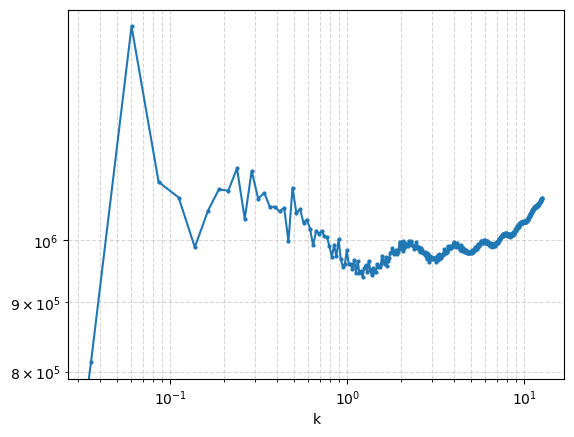

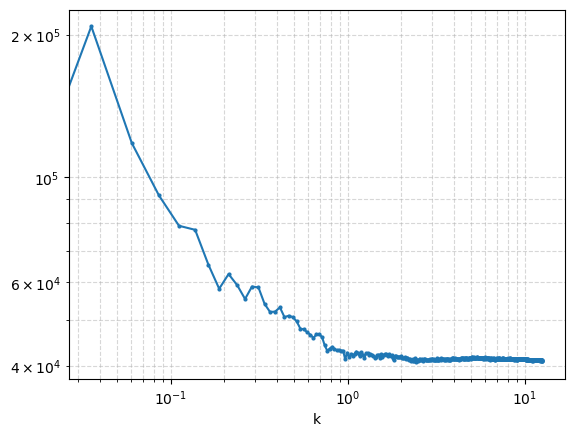

In [108]:
savefile= '/scratch/06536/qezlou/Goku/processed_data/power_bins/power_compressed_10p_Box250_Part750_0000.hdf5'
plot_power(savefile)

In [109]:

rnew, xinew =  mcfit.P2xi(knew, l=0, lowring=True)(pnew, extrap=True)


(1, 100.0)

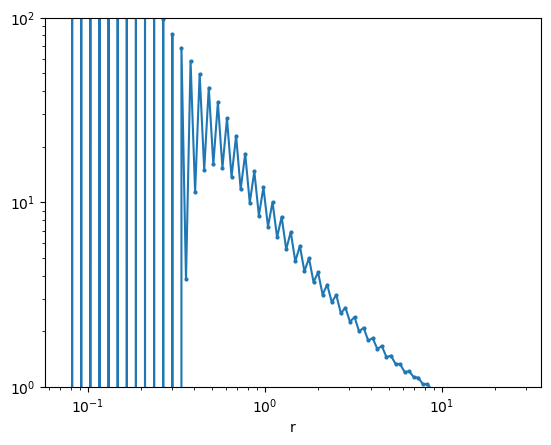

In [110]:


fig, ax = plt.subplots()

ax.plot(rnew, xinew, marker='o', label=f'bin {i}', markersize=2)
ax.set_xlabel('r')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1, 1e2)

<KeysViewHDF5 ['k', 'mbins', 'pairs', 'power', 'sim_tag']>
power shape: (6, 1665)


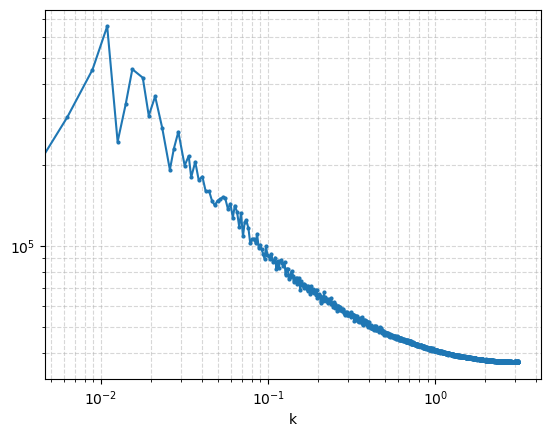

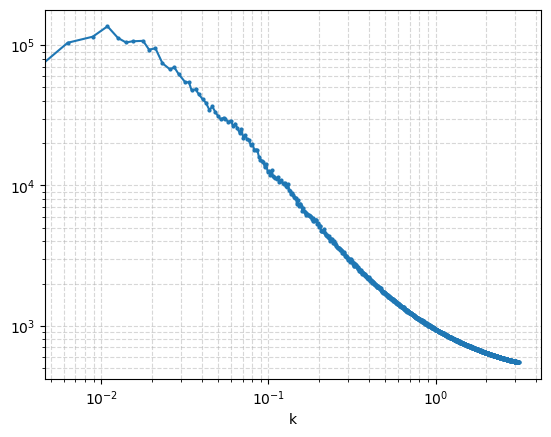

In [2]:
savefile = '/scratch/06536/qezlou/Goku/processed_data/power_bins/HF/power_compressed_10p_Box1000_Part3000_0024.hdf5'
plot_power(savefile)


In [114]:
2*np.pi/0.04, 2*np.pi/0.2

(157.07963267948966, 31.41592653589793)

In [2]:
1/3.5

0.2857142857142857

## G(k):

In [5]:
pk_file = '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0024/output/powerspectrum-0.2857.txt'
import numpy as np
import h5py 
pk = np.loadtxt(pk_file, skiprows=1)
ind = pk[:,0] < 10
km  = pk[:,0][ind]
pmm  = pk[:,1][ind]
savefile= '/scratch/06536/qezlou/Goku/processed_data/power_bins/power_compressed_10p_Box250_Part750_0000.hdf5'
with h5py.File(savefile, 'r') as f:
    print(f.keys())
    phh = f['power'][:]
    k = f['k'][:]
    ind = np.where(np.isnan(phh))[1]
    phh =np.delete(phh, ind, axis=1)
    khh = np.delete(k, ind, axis=0)
    ind = k < 10
    khh = khh[ind]
    phh = phh[6,ind]


<KeysViewHDF5 ['k', 'mbins', 'pairs', 'power', 'sim_tag']>


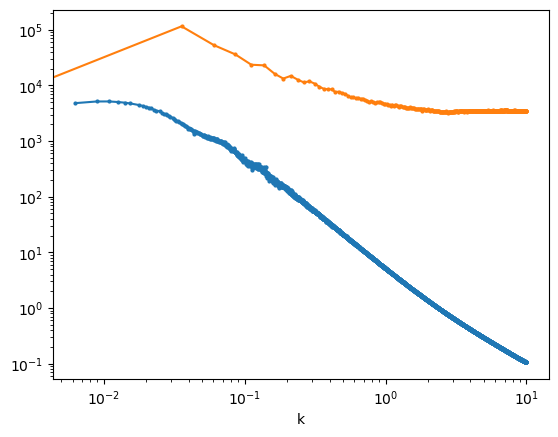

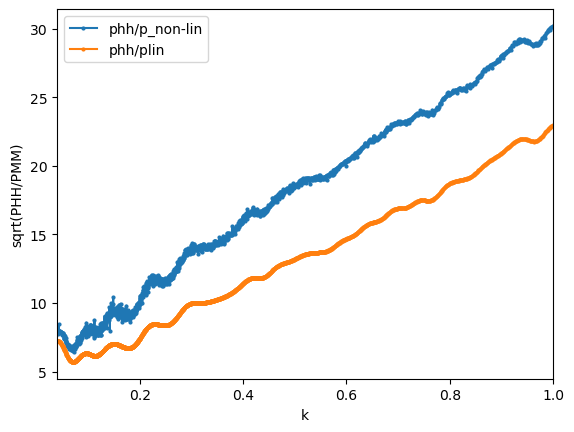

In [11]:
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
fig, ax = plt.subplots()


phh_interp = interp1d(khh, phh, kind='cubic', fill_value='extrapolate')(km)
ax.plot(km, pmm, label='Goku', marker='o', markersize=2)
ax.plot(khh, phh, label='Goku', marker='o', markersize=2)


ax.set_xlabel('k')
ax.set_xscale('log')
ax.set_yscale('log')

fig, ax = plt.subplots()
ind = (km < 1)*( km > 0.04)
ax.plot(km[ind], np.sqrt(phh_interp/pmm)[ind], label='phh/p_non-lin', marker='o', markersize=2)
ax.set_xlim(0.04, 1)
ax.set_xlabel('k')
ax.set_ylabel('sqrt(PHH/PMM)')


# Linear power at z=2.5 from Nbodykit
from nbodykit.lab import cosmology
from nbodykit.cosmology import power
cosmo = cosmology.Planck15.clone()
plin = power.linear.LinearPower(cosmo, redshift=2.5)(km)
ax.plot(km[ind], np.sqrt(phh_interp/plin)[ind], label='phh/plin', marker='o', markersize=2)

ax.legend()


## Through $P_{h, \ non-lin \ matter}$:

[0.00628319 0.00888577 0.0108828  ... 0.996342   0.997726   0.999122  ] [0.         0.00628319 0.00888577 ... 3.13750183 3.13939366 3.14127984] 0.0


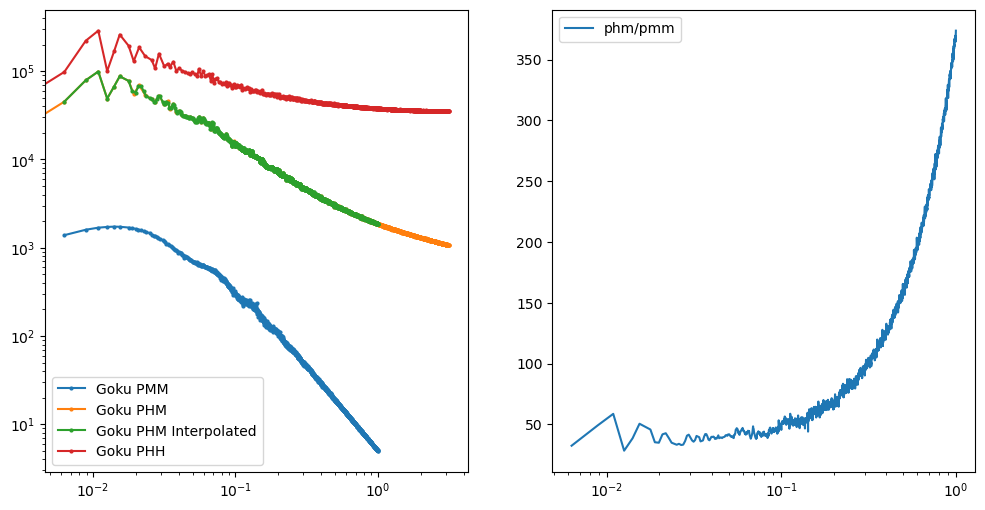

In [2]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d


def load_pmm(sim_id='0208'):
    pk_file = f'/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_{sim_id}/output/powerspectrum-0.2857.txt'
    pk = np.loadtxt(pk_file, skiprows=1)
    ind = pk[:,0] < 1
    km  = pk[:,0][ind]
    pmm  = pk[:,1][ind]
    return km, pmm

def load_phm(sim_id='0208'):
    savefile = f'/scratch/06536/qezlou/Goku/processed_data/power_hm_bins/HF/power_compressed_10p_Box1000_Part3000_{sim_id}.hdf5'
    with h5py.File(savefile, 'r') as f:
        k = f['k'][:]
        phm = f['power'][0,:]
    ind = np.where(~np.isnan(phm))[0]
    k = k[ind]
    phm = phm[ind]
    return k, phm

def load_phh(sim_id='0208'):
    savefile = f'/scratch/06536/qezlou/Goku/processed_data/power_bins/HF/power_compressed_10p_Box1000_Part3000_{sim_id}.hdf5'
    with h5py.File(savefile, 'r') as f:
        k = f['k'][:]
        phh = f['power'][0,:]  
    ind = np.where(~np.isnan(phh))[0]
    k = k[ind]
    phh = phh[ind]
    return k, phh
    
km, pmm = load_pmm()
khm, phm = load_phm()
khh, phh = load_phh()


print(km, khm, phm[0])

# interolate phm on kmm
phm_interp = interp1d(khm, phm, kind='cubic', fill_value='extrapolate')(km)
# interpolate phh on kmm
phh_interp = interp1d(khh, phh, kind='cubic', fill_value='extrapolate')(km)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(km, pmm, label='Goku PMM', marker='o', markersize=2)
ax[0].plot(khm, phm, label='Goku PHM', marker='o', markersize=2)
ax[0].plot(km, phm_interp, label='Goku PHM Interpolated', marker='o', markersize=2)
ax[0].plot(khh, phh, label='Goku PHH', marker='o', markersize=2)
ax[1].plot(km, phm_interp/pmm, label='phm/pmm')#, marker='o', markersize=2)
#ax[1].plot(km, phh_interp/phm_interp, label='phh/phm', marker='o', markersize=2)
ax[1].set_xscale('log')
ax[0].legend()
ax[1].legend()
ax[0].set_xscale('log')
ax[0].set_yscale('log')

In [57]:
km, k

(array([6.28319e-03, 8.88577e-03, 1.08828e-02, ..., 9.96768e+00,
        9.98161e+00, 9.99556e+00]),
 array([0.        ,        nan,        nan, ..., 3.13750183, 3.13939366,
        3.14127984]))

## Using sims's initial condition:

We need to run `mpgadgetic` on the initial power spectrum to get $\delta_{m, lin}$ and then calculate $P_{h, lin}(k)$

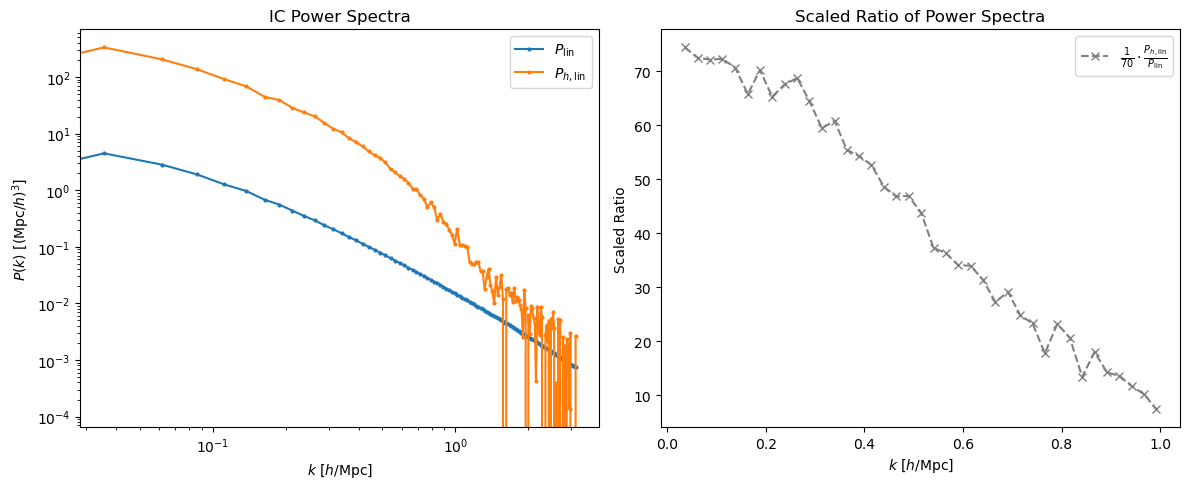

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Load data
a = np.loadtxt('/scratch/06536/qezlou/Goku/FOF/test_ICs/L2/ICS/250_750_99/all_powerspectra.txt', skiprows=1)

# Create a 1-row, 2-column plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left panel: Power spectra
ax1.plot(a[:,0], a[:,1], label=r'$P_{\mathrm{lin}}$', marker='o', markersize=2)
ax1.plot(a[:,0], a[:,2], label=r'$P_{h,\mathrm{lin}}$', marker='o', markersize=2)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$k\ [h/\mathrm{Mpc}]$')
ax1.set_ylabel(r'$P(k)\ [(\mathrm{Mpc}/h)^3]$')
ax1.set_title('IC Power Spectra')
ax1.legend(loc='upper right')

# Right panel: Ratio
ind = (a[:,0] < 1) & (a[:,0] > 0.001)
ax2.plot(a[ind,0], a[ind,2]/a[ind,1], color='gray', linestyle='--', marker='x',
         label=r'$\frac{1}{70} \cdot \frac{P_{h,\mathrm{lin}}}{P_{\mathrm{lin}}}$')
ax2.set_xlabel(r'$k\ [h/\mathrm{Mpc}]$')
ax2.set_ylabel('Scaled Ratio')
ax2.set_title('Scaled Ratio of Power Spectra')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

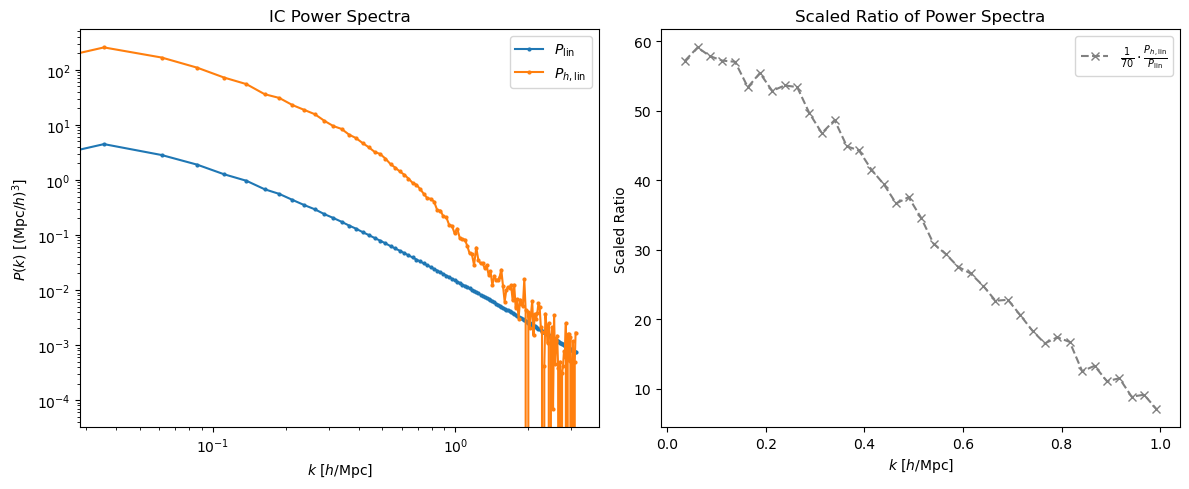

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Load data
a = np.loadtxt('/scratch/06536/qezlou/Goku/FOF/test_ICs/L2/ICS/250_750_99/all_powerspectra.txt', skiprows=1)

# Create a 1-row, 2-column plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left panel: Power spectra
ax1.plot(a[:,0], a[:,1], label=r'$P_{\mathrm{lin}}$', marker='o', markersize=2)
ax1.plot(a[:,0], a[:,2], label=r'$P_{h,\mathrm{lin}}$', marker='o', markersize=2)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$k\ [h/\mathrm{Mpc}]$')
ax1.set_ylabel(r'$P(k)\ [(\mathrm{Mpc}/h)^3]$')
ax1.set_title('IC Power Spectra')
ax1.legend(loc='upper right')

# Right panel: Ratio
ind = (a[:,0] < 1) & (a[:,0] > 0.001)
ax2.plot(a[ind,0], a[ind,2]/a[ind,1], color='gray', linestyle='--', marker='x',
         label=r'$\frac{1}{70} \cdot \frac{P_{h,\mathrm{lin}}}{P_{\mathrm{lin}}}$')
ax2.set_xlabel(r'$k\ [h/\mathrm{Mpc}]$')
ax2.set_ylabel('Scaled Ratio')
ax2.set_title('Scaled Ratio of Power Spectra')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()